In [6]:
bsc = xr.open_dataset("nc_files/ICON-ART/2021120100_ICON-ART.nc")
bsc


<xarray.Dataset>
Dimensions:     (time: 25, lat: 1041, lon: 1361, ncl3: 1)
Coordinates:
  * time        (time) datetime64[ns] 2021-12-01 ... 2021-12-04
  * lat         (lat) float64 0.0 0.0625 0.125 0.1875 ... 64.81 64.88 64.94 65.0
  * lon         (lon) float64 -25.0 -24.94 -24.88 -24.81 ... 59.88 59.94 60.0
Dimensions without coordinates: ncl3
Data variables:
    OD550_DUST  (time, lat, lon) float32 ...
    SCONC_DUST  (time, lat, lon) float32 ...
    DATE_RUN    (ncl3) int32 ...

In [7]:
# 11 19

bsc.time.to_series()[19]

Timestamp('2021-12-03 09:00:00')

In [8]:
nc_files = os.listdir("nc_files/ICON-ART/")
len(nc_files)

61

In [9]:
day1_lead_all = pd.DataFrame(columns=["stn", "lon", "lat"])
for nc_file in nc_files:
    bsc = xr.open_dataset("nc_files/ICON-ART/"+nc_file)
    day1_lead = [["stn", "lon", "lat", bsc.OD550_DUST.time.to_series()[19]]]
    for i in range(len(stn)):
        day1_bsc = bsc.OD550_DUST.isel(time = 19).sel(lat = stn_lat[i], 
                                                     lon = stn_lon[i], 
                                                     method = 'nearest')
        day1_lead.append([stn[i], stn_lon[i], stn_lat[i], day1_bsc.to_dict()["data"]])
    day1_lead = pd.DataFrame(day1_lead[1:len(day1_lead)], columns = day1_lead[0])
    day1_lead_all = day1_lead_all.merge(day1_lead, 
                                        left_on=["stn", "lon", "lat"], 
                                        right_on=["stn", "lon", "lat"],
                                        how = "outer")
#data for 1 day leadtime for all sations
day1_lead_all

,stn,lon,lat,2021-12-03 09:00:00,2021-12-04 09:00:00,2021-12-05 09:00:00,2021-12-06 09:00:00,2021-12-07 09:00:00,2021-12-08 09:00:00,2021-12-09 09:00:00,...,2022-01-23 09:00:00,2022-01-24 09:00:00,2022-01-25 09:00:00,2022-01-26 09:00:00,2022-01-27 09:00:00,2022-01-28 09:00:00,2022-01-29 09:00:00,2022-01-31 09:00:00,2022-02-01 09:00:00,2022-02-02 09:00:00
0,ABE,3.33,7.20,0.249166,0.196363,0.288353,0.397605,0.315177,0.323572,0.334277,...,0.508741,0.420360,0.414043,0.376234,0.352243,0.352944,0.832018,0.288442,0.407288,0.388133
1,ABK,8.19,6.25,0.349711,0.364460,0.517153,0.392228,0.272927,0.352040,0.414905,...,0.560040,0.408763,0.353237,0.381795,0.363724,0.868812,0.827881,0.446457,0.508172,0.564359
2,ABU,7.20,9.00,0.264358,0.390387,0.380115,0.391972,0.359369,0.410890,0.334150,...,0.509152,0.444335,0.371028,0.328937,0.352675,0.669266,0.467181,0.286516,0.270033,0.426489
3,ADO,5.20,7.60,0.239974,0.299650,0.332187,0.344380,0.296346,0.343221,0.357068,...,0.461562,0.406673,0.379208,0.311039,0.384952,0.394248,0.593998,0.290004,0.317975,0.371781
4,AKU,5.30,7.20,0.267252,0.241344,0.344357,0.345572,0.283333,0.330715,0.292975,...,0.516414,0.480891,0.440049,0.343006,0.394063,0.484263,0.594916,0.286659,0.365559,0.365558
5,ASA,6.23,6.82,0.283875,0.273779,0.389765,0.346696,0.286642,0.322523,0.344200,...,0.546703,0.513243,0.407795,0.353173,0.380393,0.625418,0.752221,0.248477,0.360096,0.374576
6,AWK,7.07,6.20,0.322255,0.338548,0.456410,0.386059,0.290489,0.307265,0.393741,...,0.508668,0.461494,0.356945,0.389663,0.382845,0.796394,0.803018,0.362656,0.457251,0.426022
7,BAU,9.82,10.28,0.526732,0.522252,0.458145,0.357236,0.343105,0.377854,0.599750,...,0.323555,0.247564,0.296562,0.361148,0.590149,0.703037,0.402367,0.204811,0.484079,0.280668
8,BEN,5.60,6.33,0.267801,0.259764,0.388205,0.366241,0.288810,0.332748,0.331940,...,0.569423,0.536530,0.450651,0.370725,0.419902,0.567588,0.817111,0.312803,0.477871,0.453727
9,BID,6.00,9.80,0.352958,0.555881,0.637760,0.416744,0.410110,0.468531,0.346403,...,0.435858,0.414131,0.389152,0.374954,0.504826,0.718808,0.405097,0.246870,0.353822,0.396879


In [10]:
day1_lead_all_t = day1_lead_all.transpose()
day1_lead_all_t.columns = day1_lead_all_t.iloc[0]
day1_lead_all_t = day1_lead_all_t.drop(["lon", "lat", "stn"])

# multiply AOD by 10
# day1_lead_all_t = day1_lead_all_t * 10

day1_lead_all_t = day1_lead_all_t.reset_index()
day1_lead_all_t

stn,index,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
0,2021-12-03 09:00:00,0.249166,0.349711,0.264358,0.239974,0.267252,0.283875,0.322255,0.526732,0.267801,...,0.571008,0.276121,0.310148,0.258757,0.203828,0.282626,0.281272,0.192603,0.695667,0.356898
1,2021-12-04 09:00:00,0.196363,0.36446,0.390387,0.29965,0.241344,0.273779,0.338548,0.522252,0.259764,...,0.457396,0.260548,0.394001,0.336181,0.321313,0.247683,0.485806,0.315136,0.590972,0.37731
2,2021-12-05 09:00:00,0.288353,0.517153,0.380115,0.332187,0.344357,0.389765,0.45641,0.458145,0.388205,...,0.338183,0.32307,0.356304,0.447513,0.37677,0.37118,0.540811,0.342409,0.450165,0.338345
3,2021-12-06 09:00:00,0.397605,0.392228,0.391972,0.34438,0.345572,0.346696,0.386059,0.357236,0.366241,...,0.433828,0.402134,0.491091,0.397426,0.399334,0.39286,0.425598,0.337536,0.296101,0.359243
4,2021-12-07 09:00:00,0.315177,0.272927,0.359369,0.296346,0.283333,0.286642,0.290489,0.343105,0.28881,...,0.195812,0.293896,0.47238,0.298082,0.278249,0.298187,0.397599,0.279321,0.299435,0.308485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-01-28 09:00:00,0.352944,0.868812,0.669266,0.394248,0.484263,0.625418,0.796394,0.703037,0.567588,...,0.484272,0.464448,0.601697,0.718852,0.571326,0.550208,0.643573,0.435061,0.803718,0.557886
57,2022-01-29 09:00:00,0.832018,0.827881,0.467181,0.593998,0.594916,0.752221,0.803018,0.402367,0.817111,...,0.249113,0.760785,0.377397,0.819664,0.734385,0.788642,0.433474,0.761705,0.659128,0.315412
58,2022-01-31 09:00:00,0.288442,0.446457,0.286516,0.290004,0.286659,0.248477,0.362656,0.204811,0.312803,...,0.175703,0.199239,0.195577,0.508505,0.622161,0.439524,0.262198,0.536011,0.348633,0.219692
59,2022-02-01 09:00:00,0.407288,0.508172,0.270033,0.317975,0.365559,0.360096,0.457251,0.484079,0.477871,...,0.300383,0.225415,0.386952,0.554645,0.591874,0.493952,0.396016,0.604199,0.676686,0.44511


In [11]:
day1_lead_all_t["index"] = pd.to_datetime(day1_lead_all_t["index"], format="%Y-%m-%d").dt.date
day1_lead_all_t = day1_lead_all_t.set_index("index")
day1_lead_all_t

stn,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
index,,,,,,,,,,,,,,,,,,,,,
2021-12-03,0.249166,0.349711,0.264358,0.239974,0.267252,0.283875,0.322255,0.526732,0.267801,0.352958,...,0.571008,0.276121,0.310148,0.258757,0.203828,0.282626,0.281272,0.192603,0.695667,0.356898
2021-12-04,0.196363,0.36446,0.390387,0.29965,0.241344,0.273779,0.338548,0.522252,0.259764,0.555881,...,0.457396,0.260548,0.394001,0.336181,0.321313,0.247683,0.485806,0.315136,0.590972,0.37731
2021-12-05,0.288353,0.517153,0.380115,0.332187,0.344357,0.389765,0.45641,0.458145,0.388205,0.63776,...,0.338183,0.32307,0.356304,0.447513,0.37677,0.37118,0.540811,0.342409,0.450165,0.338345
2021-12-06,0.397605,0.392228,0.391972,0.34438,0.345572,0.346696,0.386059,0.357236,0.366241,0.416744,...,0.433828,0.402134,0.491091,0.397426,0.399334,0.39286,0.425598,0.337536,0.296101,0.359243
2021-12-07,0.315177,0.272927,0.359369,0.296346,0.283333,0.286642,0.290489,0.343105,0.28881,0.41011,...,0.195812,0.293896,0.47238,0.298082,0.278249,0.298187,0.397599,0.279321,0.299435,0.308485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,0.352944,0.868812,0.669266,0.394248,0.484263,0.625418,0.796394,0.703037,0.567588,0.718808,...,0.484272,0.464448,0.601697,0.718852,0.571326,0.550208,0.643573,0.435061,0.803718,0.557886
2022-01-29,0.832018,0.827881,0.467181,0.593998,0.594916,0.752221,0.803018,0.402367,0.817111,0.405097,...,0.249113,0.760785,0.377397,0.819664,0.734385,0.788642,0.433474,0.761705,0.659128,0.315412
2022-01-31,0.288442,0.446457,0.286516,0.290004,0.286659,0.248477,0.362656,0.204811,0.312803,0.24687,...,0.175703,0.199239,0.195577,0.508505,0.622161,0.439524,0.262198,0.536011,0.348633,0.219692


In [12]:
# na.array(vis['YOL'])
# merged = pd.merge(vis[["YOL"]], day1_lead_all_t[["YOL"]], left_index=True, right_on="index")
merged = pd.concat([vis[["YOL"]], day1_lead_all_t[["YOL"]]], axis=1)
merged.columns = ["Visibility", "AOD"]
merged

,Visibility,AOD
2021-12-01,10.0,NaN
2021-12-02,1.0,NaN
2021-12-03,1.6,0.695667
2021-12-04,2.0,0.590972
2021-12-05,5.0,0.450165
...,...,...
2022-01-29,5.0,0.659128
2022-01-30,5.0,NaN
2022-01-31,8.0,0.348633
2022-02-01,NaN,0.676686


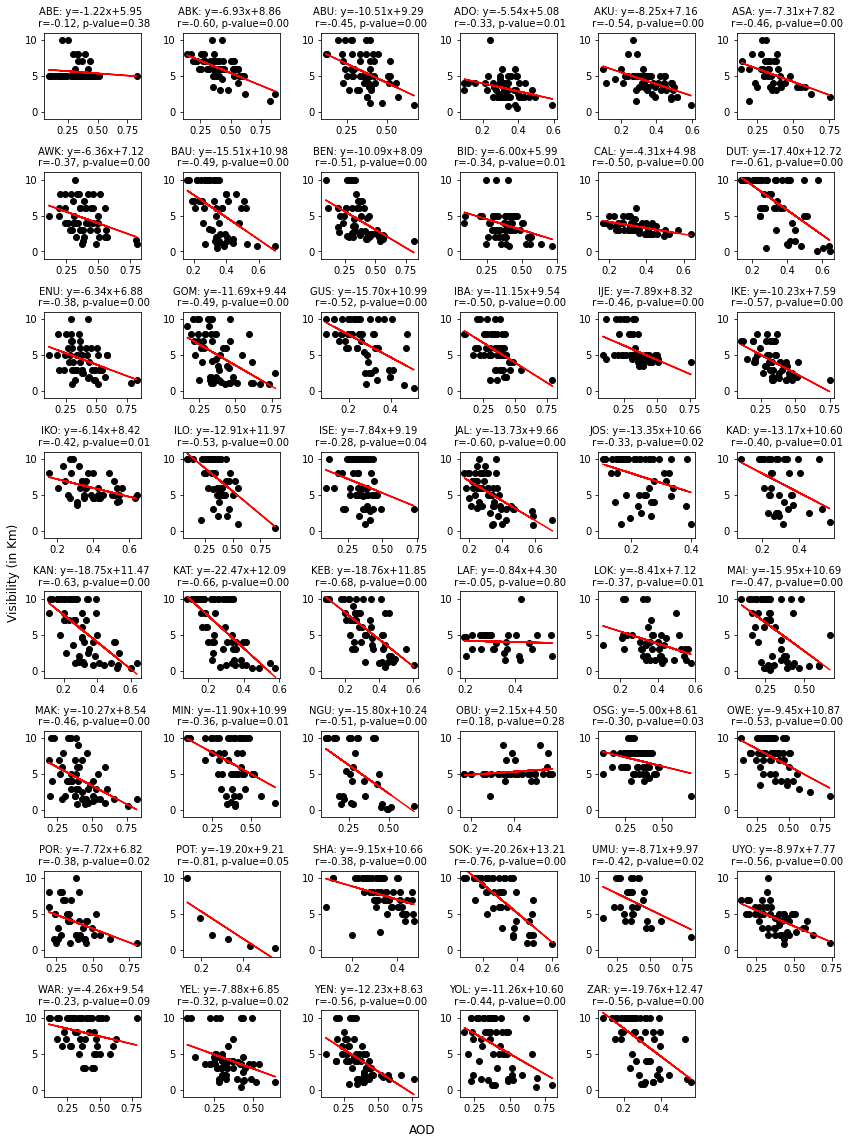

In [13]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

cor_ls = []

fig = plt.figure(figsize=(12,16))
# fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, j in enumerate(stn):
    merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
    merged.columns = ["Visibility", "AOD"]
    a=merged.dropna()
#     regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(list(a['AOD']),list(a['Visibility']))
    line = (slope*a['AOD'])+intercept
    
    # append correlation
    cor_ls.append([stn_lat[i], stn_lon[i], j, round(r_value, 2), round(p_value, 2)])
    
    ax = fig.add_subplot(8,6,i+1, )
    ax.scatter(merged['AOD'], merged['Visibility'], color = 'k')
    ax.plot(list(a['AOD']), line, 'r')
    title = j+': y={:.2f}x+{:.2f} \n '.format(slope,intercept)  + 'r={:.2f}, '.format(r_value) + 'p-value={:.2f}'.format(p_value)

    ax.set_title(title, fontsize = 10)
#     ax.set_xlim([0, 1.5])
    ax.set_ylim([-1, 11])
    
#     ax.set_ylabel('Visibility (in Km)')
#     ax.set_xlabel('bbb')
# fig.suptitle('a')
fig.supxlabel('AOD')
fig.supylabel('Visibility (in Km)')
fig.tight_layout(rect=(0.0,0,1,1))
    
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X")
# plt.ylabel("common Y")    
#     plt.subplot(7,7,i+1)
#     plt.scatter(merged['AOD'], merged['Visibility'], color = 'k', ls='solid')
#     plt.title(j)
# plt.xlabel('AOD')
# plt.ylabel('Visibility (in Km)')
#     plt.text(j)
#     for j in stn:
        
#         plt.subplot(2, 3, i)
#         plt.scatter(merged['AOD'], merged['Visibility'])
# # #         plt.text(0.5, 0.5, str((2, 3, i)),
# # #                  fontsize=18, ha='center')
            


# # fig = plt.figure(figsize=(3,3))
# fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(15,15))
# plt.subplots_adjust(hspace=0.2)
# for j, ax in zip(stn, axs.ravel()):
#     print(j, ax)
#     merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
#     merged.columns = ["Visibility", "AOD"]
# #     merged['AOD'].scatter(merged['Visibility'],ax=ax)
#     plt.scatter(merged['AOD'], merged['Visibility'],ax=ax)
# #     plt.figure()
# #     plt.scatter(merged['AOD'], merged['Visibility'],color='k', ls='solid')
# #     plt.show()
    
    

In [14]:
cor_df = pd.DataFrame(cor_ls, columns=["Lat", "Long", "Station", "r_value", "p_value"])
cor_df['p'] = 2
cor_df.loc[cor_df['p_value'] > 0.05, 'p'] = 1
cor_df

,Lat,Long,Station,r_value,p_value,p
0,7.20,3.33,ABE,-0.12,0.38,1
1,6.25,8.19,ABK,-0.60,0.00,2
2,9.00,7.20,ABU,-0.45,0.00,2
3,7.60,5.20,ADO,-0.33,0.01,2
4,7.20,5.30,AKU,-0.54,0.00,2
5,6.82,6.23,ASA,-0.46,0.00,2
6,6.20,7.07,AWK,-0.37,0.00,2
7,10.28,9.82,BAU,-0.49,0.00,2
8,6.33,5.60,BEN,-0.51,0.00,2
9,9.80,6.00,BID,-0.34,0.01,2


In [15]:
# cor_df.to_csv("cor_files/day1/ICON-ART_1d.csv", index=False)
cor_df.to_csv("cor_files/day2/ICON-ART_2d.csv", index=False)
# cor_df.to_csv("cor_files/day3/ICON-ART_3d.csv", index=False)

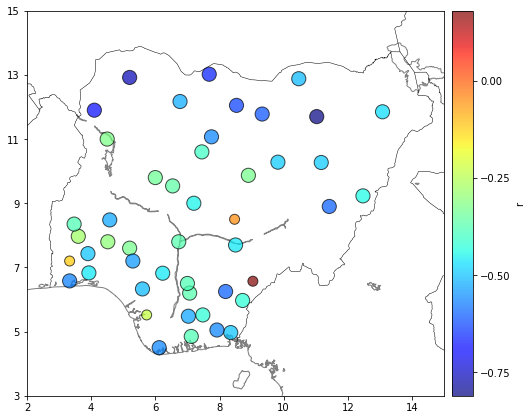

In [16]:
# plot coastlines with Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='h',
llcrnrlat=3, urcrnrlat=15,
llcrnrlon=2, urcrnrlon=15)
# m.drawmapboundary(fill_color='#DDEEFF')
# m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='grey', zorder=2)
m.drawcountries(color='black', zorder=2)
# m.shadedrelief()
m.drawstates()

# m.readshapefile('./nigeria_states/nigeria_states', 'nigeria_states')

# plot locations
m.scatter(cor_df["Long"], cor_df["Lat"], latlon=True, 
          c=cor_df["r_value"], s=cor_df["p"]*100,
          edgecolors="black", zorder=3,
          cmap='jet', alpha=0.7)

# create colorbar and legend
m.colorbar(label=r'r', ticks=np.linspace(1, -1, 9), shrink=0.755)
# plt.set_ticks(np.linspace(1, -1, 9))
plt.xticks(range(2, 16, 2))
plt.yticks(range(3, 16, 2))
plt.show()